In [1]:
import os
import numpy as np
import pickle as pkl
from os.path import join as pjoin
from matplotlib import pyplot as plt
from statsmodels.stats.multitest import multipletests
from magicbox.algorithm.plot import MidpointNormalize
from cxy_visual_dev.lib.predefine import proj_dir

anal_dir = pjoin(proj_dir, 'analysis')
work_dir = pjoin(anal_dir, 'plot/RSM')
if not os.path.isdir(work_dir):
    os.makedirs(work_dir)

In [3]:
def plot_sym_mat(fpath, items, mtc, out_file, figsize, title, show_value, show_name, show_grid, show_cbar):
    """
    show image for 对称矩阵

    Args:
        fpath ([type]): [description]
        items ([type]): [description]
        mtc ([type]): [description]
        out_file ([type]): [description]
        figsize ([type]): [description]
        title ([type]): [description]
        show_value ([type]): [description]
        show_name ([type]): [description]
        show_grid ([type]): [description]
        show_cbar ([type]): [description]
    """
    data = pkl.load(open(fpath, 'rb'))
    assert data['row_name'] == data['col_name']
    if items == 'all':
        items = data['row_name']
    n_item = len(items)
    item_indices = [data['row_name'].index(i) for i in items]
    r_arr = data['r'][item_indices][:, item_indices]
    p_arr = data['p'][item_indices][:, item_indices]
    diag_mask = np.eye(n_item, dtype=bool)
    if mtc:
        tril_mask = np.tri(n_item, k=-1, dtype=bool)
        reject, p_arr[tril_mask], alpha_sidak, alpha_bonf = \
            multipletests(p_arr[tril_mask], 0.05, 'fdr_bh')

        triu_mask = tril_mask.T
        p_arr[triu_mask] = p_arr.T[triu_mask]
    p_mask = p_arr < 0.05

    # r_arr = np.ma.array(data['r'], mask=diag_mask)
    r_arr[diag_mask] = np.nan
    fig, ax = plt.subplots(figsize=figsize)
    ticks = np.arange(n_item)
    img = ax.imshow(r_arr, 'coolwarm', norm=MidpointNormalize(midpoint=0.))
    if show_cbar:
        fig.colorbar(img)
    if show_name:
        ax.set_xticks(ticks)
        ax.set_xticklabels(items)
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
                rotation_mode="anchor")
        ax.set_yticks(ticks)
        ax.set_yticklabels(items)
    else:
        ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
    ax.set_title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    if show_grid:
        grid_ticks = np.r_[ticks-.5, ticks[-1]+.5]
        ax.set_xticks(grid_ticks, minor=True)
        ax.set_yticks(grid_ticks, minor=True)
        ax.grid(which="minor", color="w", linestyle='-', linewidth=1.5)
        ax.tick_params(which="minor", bottom=False, left=False)

    if show_value:
        for i in range(n_item):
            for j in range(n_item):
                # if isinstance(r_arr[i, j], np.ma.core.MaskedConstant):
                if np.isnan(r_arr[i, j]):
                    continue

                if p_mask[i, j]:
                    weight = 'bold'
                else:
                    weight = None

                ax.text(j, i, '{:.2f}'.format(r_arr[i, j]),
                        ha="center", va="center", color="k", weight=weight)

    fig.tight_layout()
    if out_file is None:
        fig.show()
    else:
        fig.savefig(out_file)

RSM_HCPD-myelin_MMP-vis3-R_age-6.pkl
RSM_HCPD-myelin_MMP-vis3-R_age-7.pkl
RSM_HCPD-myelin_MMP-vis3-R_age-8.pkl
RSM_HCPD-myelin_MMP-vis3-R_age-12.pkl
RSM_HCPD-myelin_MMP-vis3-R_age-18.pkl
RSM_HCPD-thickness_MMP-vis3-R_age-6.pkl
RSM_HCPD-thickness_MMP-vis3-R_age-7.pkl
RSM_HCPD-thickness_MMP-vis3-R_age-8.pkl
RSM_HCPD-thickness_MMP-vis3-R_age-12.pkl
RSM_HCPD-thickness_MMP-vis3-R_age-18.pkl


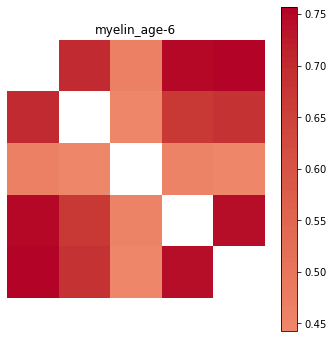

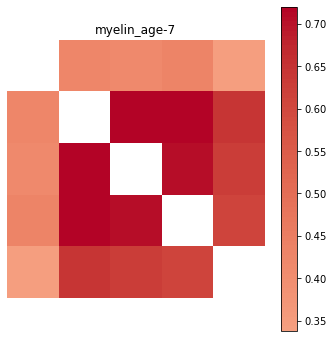

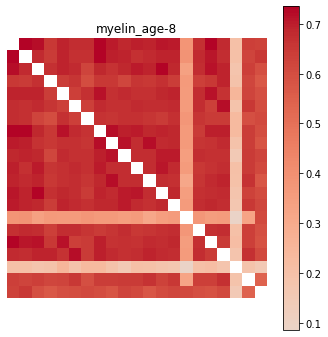

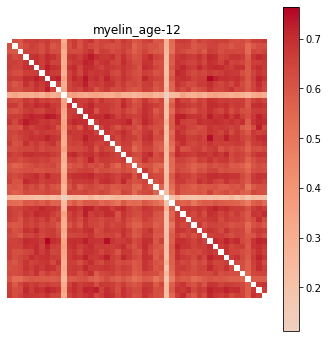

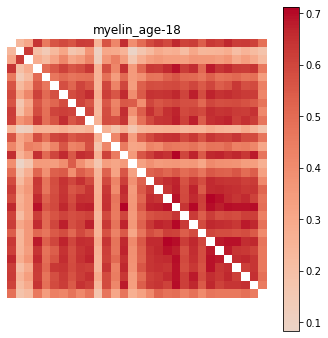

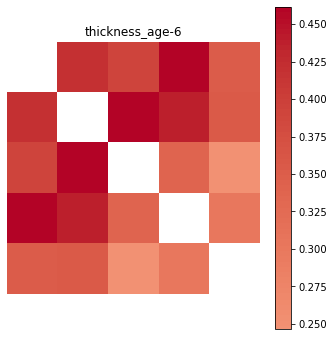

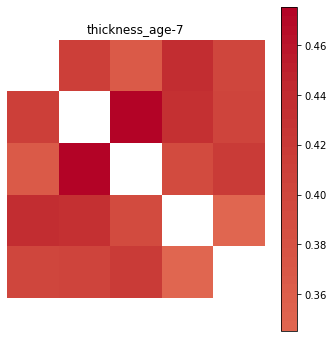

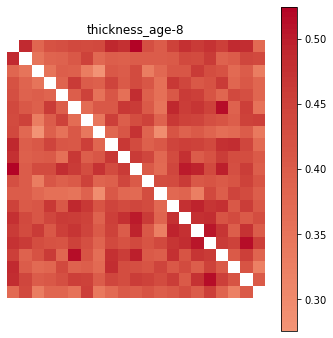

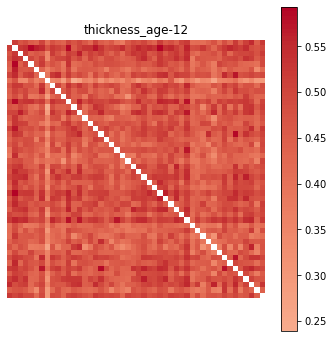

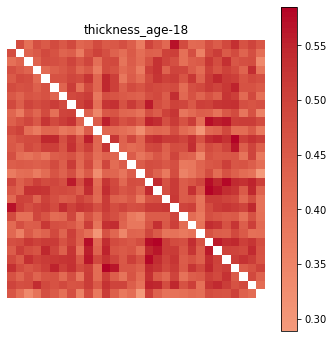

In [5]:
meas_names = ['myelin', 'thickness']
ages = [6, 7, 8, 12, 18]

for meas_name in meas_names:
    for age in ages:
        fname = f'RSM_HCPD-{meas_name}_MMP-vis3-R_age-{age}.pkl'
        print(fname)
        plot_sym_mat(
            fpath=pjoin(anal_dir, f'RSM/{fname}'), items='all', mtc=False,
            out_file=pjoin(work_dir, f"{fname.split('.')[0]}.jpg"),
            figsize=(4.8, 4.8), title=f'{meas_name}_age-{age}',
            show_name=False, show_value=False, show_grid=False,
            show_cbar=True
        )